## Timeseries

https://pandas.pydata.org/pandas-docs/stable/timeseries.html

- generate sequences of fixed-frequency dates and time spans
- conform or convert time series to a particular frequency (upsample, downsample)
- compute “relative” dates based on various non-standard time increments (e.g. 5 business days before the last - business day of the year), or “roll” dates forward or backward

- [pandas.Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html?highlight=timestamp#)
  - date, time, datetime
- [pandas.Timedelta](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)
  - can be add or substract to timestamps
  - offsets (first/last day of month)
- [pandas.Interval](https://pandas.pydata.org/docs/reference/api/pandas.Interval.html?highlight=interval)
  - from timestamp to timestamp, from date to date, from int to int
  - open/closed left/right
- [pandas.Period](https://pandas.pydata.org/docs/reference/api/pandas.Period.html)
  - weekday, month, year

![jd](https://www.disruptive-technologies.com/hs-fs/hubfs/DTSensorFlow%20(1).gif?width=1200&name=DTSensorFlow%20(1).gif "chess")

In [3]:
import pandas as pd
import requests
import io
import json
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.size'] = 22

In [4]:
# Creating a date range
time_range = pd.date_range(start='2018.01.01', end='2018.1.3')
time_range

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq='D')

In [43]:
# Creating a dataframe with date range index
time_df = pd.DataFrame(index=time_range, data=[[23, 100],[26,94],[39,61]], columns=['temperature', 'battery'])
time_df

,temperature,battery
2018-01-01,23,100
2018-01-02,26,94
2018-01-03,39,61


#### Upsample to hourly sampling

In [52]:
time_range_h = pd.date_range(start='2018.01.01', end='2018.1.3', freq='H')

time_df_upsampled = time_df.reindex(time_range_h)
time_df_upsampled.head()

,temperature,battery
2018-01-01 00:00:00,23.0,100.0
2018-01-01 01:00:00,NaN,NaN
2018-01-01 02:00:00,NaN,NaN
2018-01-01 03:00:00,NaN,NaN
2018-01-01 04:00:00,NaN,NaN


#### Interpolate hours between days 

In [53]:
time_df_interpolated = time_df_upsampled.interpolate(method='linear')
time_df_interpolated.head()

,temperature,battery
2018-01-01 00:00:00,23.000,100.00
2018-01-01 01:00:00,23.125,99.75
2018-01-01 02:00:00,23.250,99.50
2018-01-01 03:00:00,23.375,99.25
2018-01-01 04:00:00,23.500,99.00


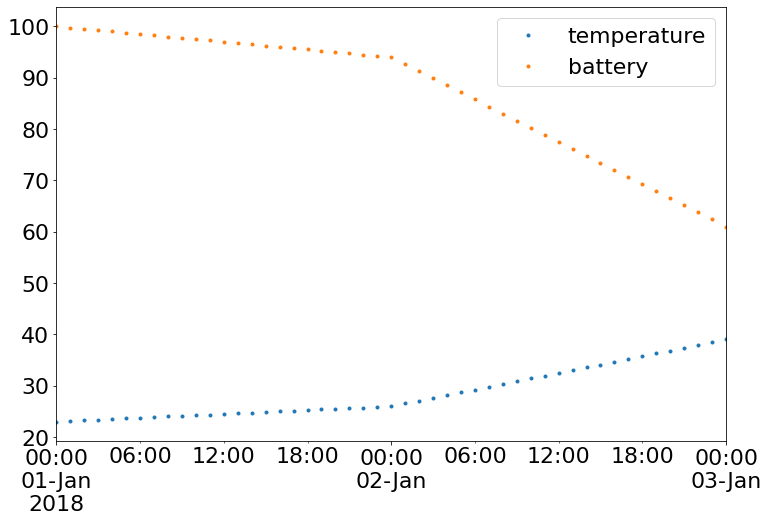

In [46]:
time_df_interpolated.plot(style='.');

## Fridge touch sensor

In [55]:
thing_id = "206843648"
api_key = %env DT_API_KEY

url = "https://api.disruptive-technologies.com/v1/things/{thing_id}/aggregate".format(thing_id=thing_id)
headers = {
    'Authorization': 'ApiKey {api_key}'.format(api_key=api_key),
    'Cache-Control': 'no-cache',
    'Content-Type': 'application/json',
}
body = {}
body['interval'] = '1s'
body['time_period'] = {
'start': '2014-11-01T00:01:00Z',
'end': '2099-12-31T20:00:00Z'
}

jsonData = requests.post(url, headers=headers, data=json.dumps(body)).json()

# This is useful for normalizing semi-structured JSON data into a flat table.
normalized = pd.json_normalize(jsonData['values'])
df = pd.DataFrame.from_dict(normalized)

UsageError: Environment does not have key: DT_API_KEY


In [56]:
df = pd.read_excel('dt_fridge_sensor_backup.xlsx')
df.head()

,Unnamed: 0,battery_percentage,battery_voltage,device_id,event_type,last_pressed,object_present,rssi,rssi_strength,temperature,thing_id,thing_type_id,time,touch
0,0,100,2.96,206843648,touch_trigger,2017-08-30 17:19:38.667240259 +0000 UTC,True,-95,1,27,206843648,touch,2017-08-30T17:19:38.667240259Z,True
1,1,100,2.96,206843648,touch_trigger,2017-08-30 17:19:39.827277058 +0000 UTC,True,-102,1,27,206843648,touch,2017-08-30T17:19:39.827277058Z,True
2,2,100,2.87,206843648,touch_trigger,2017-08-30 17:19:40.867378898 +0000 UTC,True,-101,1,27,206843648,touch,2017-08-30T17:19:40.867378898Z,True
3,3,100,2.96,206843648,touch_trigger,2017-08-30 17:36:03.647336883 +0000 UTC,True,-87,2,27,206843648,touch,2017-08-30T17:36:03.647336883Z,True
4,4,100,2.96,206843648,touch_trigger,2017-09-05 14:10:59.257377029 +0000 UTC,True,-80,3,27,206843648,touch,2017-09-05T14:10:59.257377029Z,True


#### Set timestamps as index

In [57]:
df = df.astype({'touch': 'int'})
df.dtypes

Unnamed: 0              int64
battery_percentage      int64
battery_voltage       float64
device_id               int64
event_type             object
last_pressed           object
object_present           bool
rssi                    int64
rssi_strength           int64
temperature             int64
thing_id                int64
thing_type_id          object
time                   object
touch                   int64
dtype: object

In [58]:
df['time'] = pd.to_datetime(df.time)
df.set_index('time', inplace=True)
df.dtypes

Unnamed: 0              int64
battery_percentage      int64
battery_voltage       float64
device_id               int64
event_type             object
last_pressed           object
object_present           bool
rssi                    int64
rssi_strength           int64
temperature             int64
thing_id                int64
thing_type_id          object
touch                   int64
dtype: object

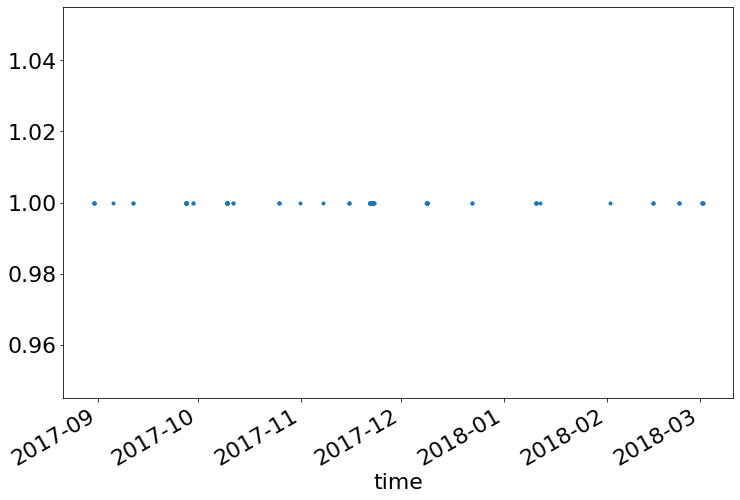

In [59]:
df.touch.plot(style='.');

### Find a better way to visualize touch events

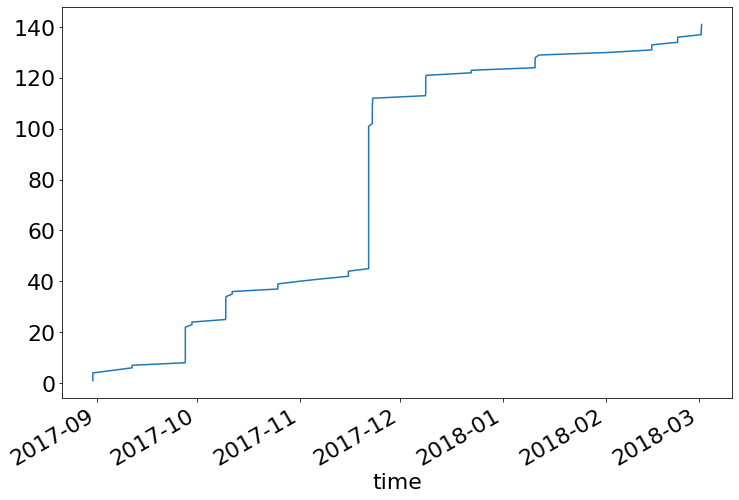

In [14]:
df.touch.cumsum().plot();

### Resample timeseries

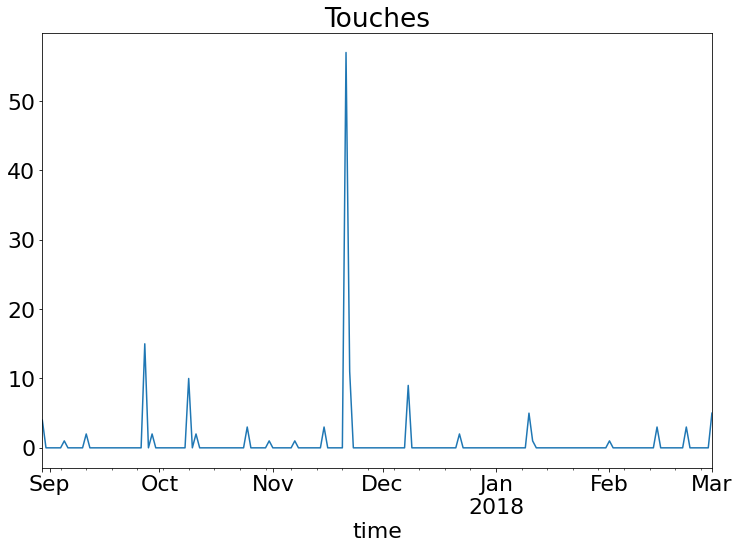

In [15]:
touch_day = df.touch.resample('D').count()
touch_day.plot(title='Touches');

### What was the day with highest touch frequency?

In [17]:
touch_day.idxmax()

Timestamp('2017-11-21 00:00:00+0000', tz='UTC', freq='D')

### Resample to minute

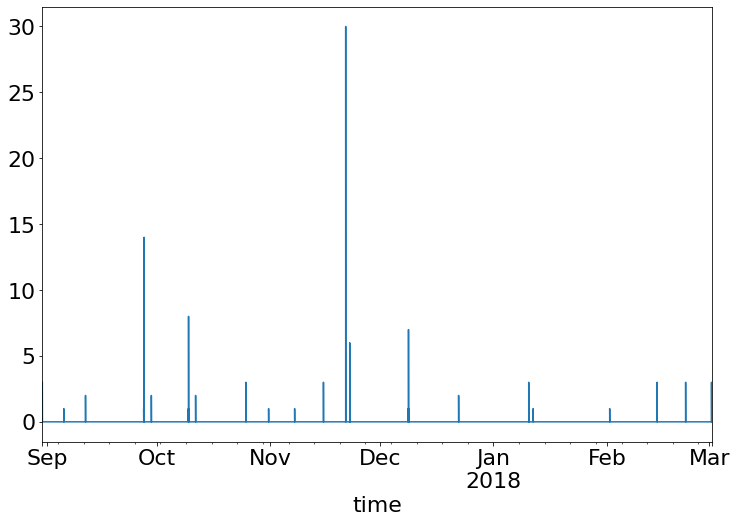

In [18]:
touch_min = df.touch.resample('min').count()
touch_min.plot();

## Investigate the peak in late November

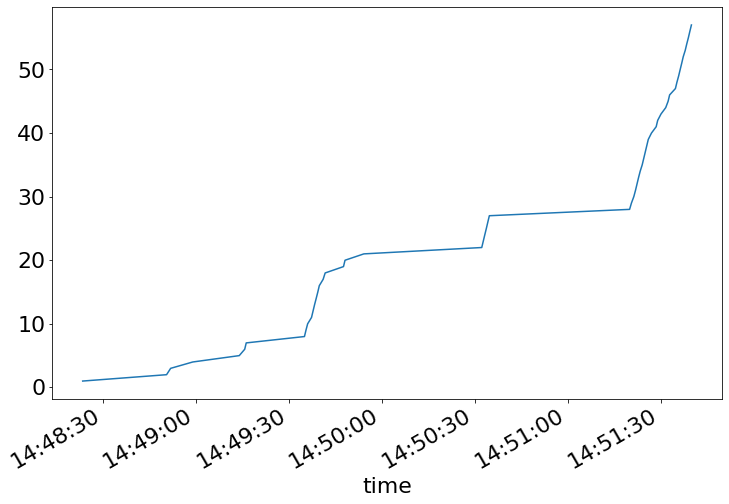

In [32]:
delta = pd.Timedelta('0 days 1 hours')
#delta = pd.Timedelta(hours=1)

idx = touch_min.idxmax()

touch_galore = df.loc[idx-delta:idx+delta]
touch_galore['touch'].cumsum().plot();

### Group by weekday

Exhaustive resource: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [61]:
df['weekday'] = df.index.weekday
df.groupby('weekday').sum()

,Unnamed: 0,battery_percentage,battery_voltage,device_id,event_type,last_pressed,object_present,rssi,rssi_strength,temperature,thing_id,thing_type_id,touch,weekday
time,,,,,,,,,,,,,,
2017-08-30 17:19:38.667240259+00:00,0,100,2.96,206843648,touch_trigger,2017-08-30 17:19:38.667240259 +0000 UTC,True,-95,1,27,206843648,touch,1,2
2017-08-30 17:19:39.827277058+00:00,1,100,2.96,206843648,touch_trigger,2017-08-30 17:19:39.827277058 +0000 UTC,True,-102,1,27,206843648,touch,1,2
2017-08-30 17:19:40.867378898+00:00,2,100,2.87,206843648,touch_trigger,2017-08-30 17:19:40.867378898 +0000 UTC,True,-101,1,27,206843648,touch,1,2
2017-08-30 17:36:03.647336883+00:00,3,100,2.96,206843648,touch_trigger,2017-08-30 17:36:03.647336883 +0000 UTC,True,-87,2,27,206843648,touch,1,2
2017-09-05 14:10:59.257377029+00:00,4,100,2.96,206843648,touch_trigger,2017-09-05 14:10:59.257377029 +0000 UTC,True,-80,3,27,206843648,touch,1,1


#### Map to weekday names

In [24]:
weekdays = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']
def to_weekday(i: int) -> str:
    return weekdays[i]
to_weekday(1)

'Tirsdag'

In [25]:
df['weekday'] = df['weekday'].apply(to_weekday)

# Can use categorical type!
df['weekday'].astype("category")

time
2017-08-30 17:19:38.667240259+00:00     Onsdag
2017-08-30 17:19:39.827277058+00:00     Onsdag
2017-08-30 17:19:40.867378898+00:00     Onsdag
2017-08-30 17:36:03.647336883+00:00     Onsdag
2017-09-05 14:10:59.257377029+00:00    Tirsdag
                                        ...   
2018-03-01 13:57:10.943873889+00:00    Torsdag
2018-03-01 13:57:11.433866691+00:00    Torsdag
2018-03-01 13:57:12.483793110+00:00    Torsdag
2018-03-01 16:33:28.163809592+00:00    Torsdag
2018-03-01 16:38:24.833792989+00:00    Torsdag
Name: weekday, Length: 141, dtype: category
Categories (5, object): ['Fredag', 'Mandag', 'Onsdag', 'Tirsdag', 'Torsdag']

#### Touch events by weekday

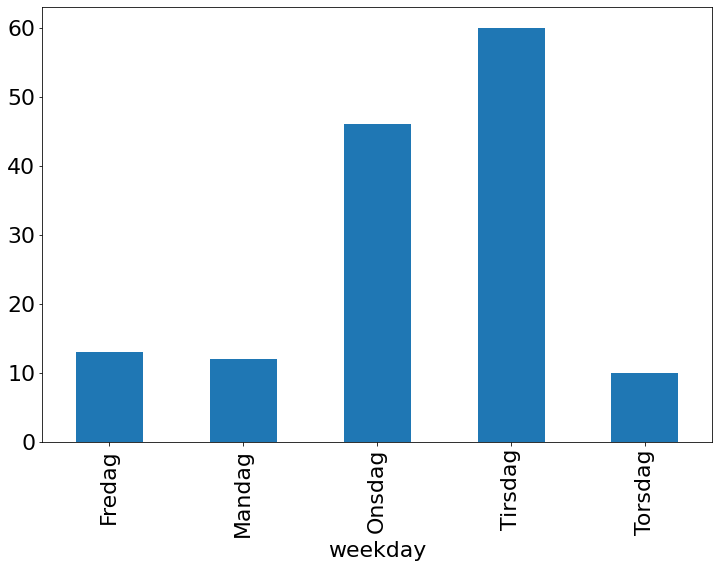

In [26]:
df.groupby('weekday').touch.count().plot(kind='bar');

#### Drop the 50+ touch events from november 21th between 14:48 and 14:52

In [27]:
len(df.drop(touch_galore.index)), len(df)

(84, 141)

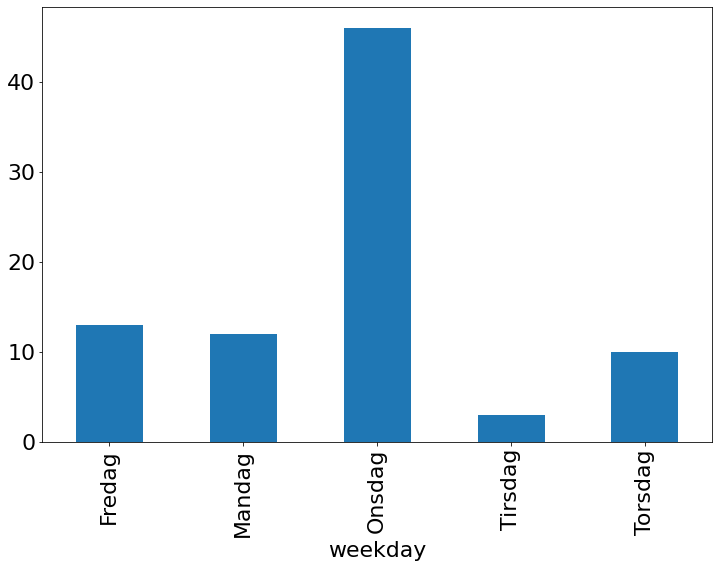

In [28]:
without_nov_21 = df.drop(touch_galore.index)

by_weekday = without_nov_21.groupby('weekday').touch.count()
by_weekday.plot(kind='bar');

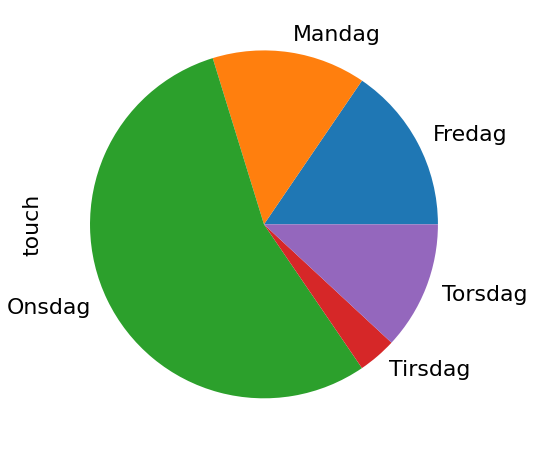

In [29]:
# try pie chart
by_weekday.plot(kind='pie', figsize=(8,8));

#### Plot touch frequency on Wednesdays

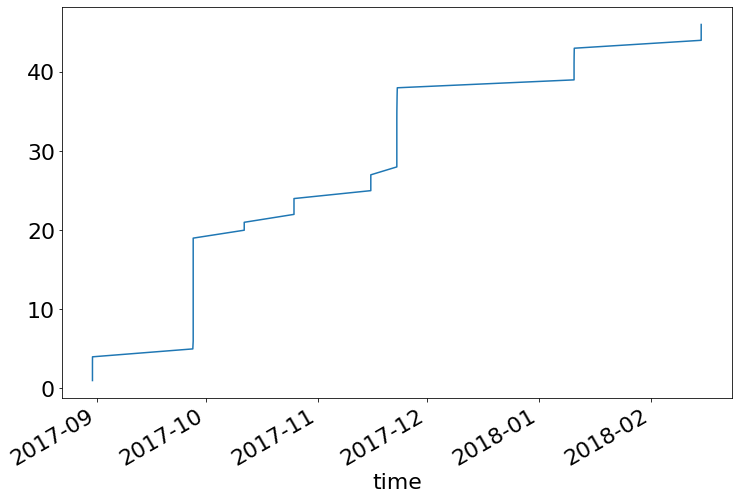

In [33]:
df[df.weekday == 'Onsdag'].touch.cumsum().plot();

In [34]:
df.index.month

Int64Index([8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
            ...
            2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
           dtype='int64', name='time', length=141)

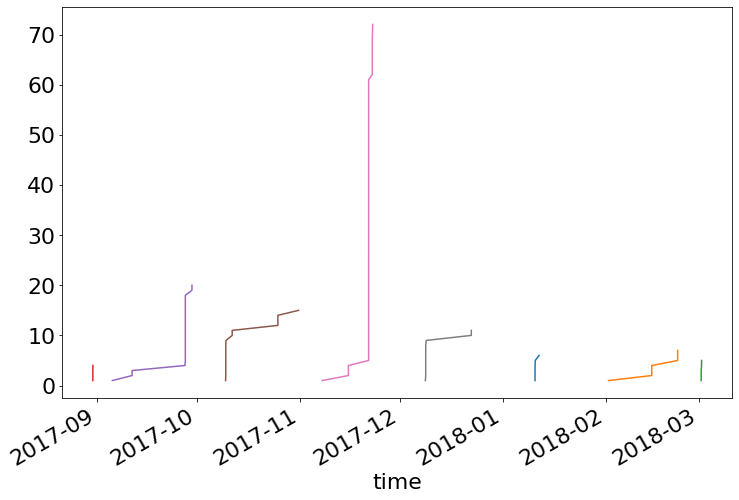

In [35]:
for (month, group) in df.groupby(df.index.month):
    group.object_present.cumsum().plot();

### End of slides